In [1]:
import subprocess as sp
import json
import matplotlib.pyplot as plt

In [16]:
# load gap count scores
with open(f"../data/UP000005640_9606_gapcount.json") as f:
    gapcounts = json.load(f)
print(len(gapcounts), "gapcount scores loaded")

20600 gapcount scores loaded


In [17]:
# load Neff scores
with open(f"../data/UP000005640_9606_neff_fast.json") as f:
    neffs = json.load(f)
print(len(neffs), "neff scores loaded")

18741 neff scores loaded


In [18]:
PROT_ID = "Q3LI62" # accession number of small example protein

In [19]:
# extract MSA
PROTEOME_FILE = "../data/UP000005640_9606.tar"
FILENAME = f"UP000005640_9606/msas/{PROT_ID}.a3m"
msa = sp.run(f"tar -xOf {PROTEOME_FILE} {FILENAME}", check=True, shell=True, capture_output=True)
msa = msa.stdout.decode()
seqs = msa.split("\n")[1::2]
seqs

['MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSYSAR',
 'MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSHSAR',
 'MSYYSHLSGDLGC-XAVAVAMGSTVSVGEXGRCRHGCHPSYSAR',
 '-----------------AVAVGMTVTVTEYGRCRHGCHPSCSAR',
 'MSYYSHLS-------AVAVAMGS--------RCRHGCHPSYSAR',
 'MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSYSAR',
 'MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSYSAR',
 '--------GGLGCGYAWAVAMGRTVAVAEYGRCGHGCQPSCSAR',
 'MSYYSHLS-------AVAVAMG--------SRCRHGCHPSYSAR']

In [21]:
assert PROT_ID in gapcounts
assert PROT_ID in neffs

In [24]:
gapcount = gapcounts[PROT_ID]
neff = neffs[PROT_ID]
len(gapcount), len(neff)

(44, 44)

In [31]:
gapcount[:20], [int(s) for s in neff][:20]

([6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 5, 7, 7, 8, 8, 8],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 4, 5, 5, 5])

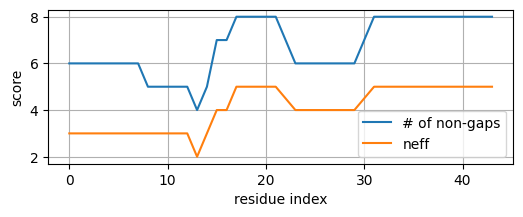

In [43]:
plt.figure(figsize=(6,2))
plt.plot(gapcount, label="# of non-gaps")
plt.plot(neff, label="neff")
plt.grid()
plt.ylabel("score")
plt.xlabel("residue index")
plt.legend(loc="lower right");

In [52]:
print(" query: ", seqs[0])
for idx, seq in enumerate(seqs[1:]):
  print(f"match {idx:1}:", seq)

 query:  MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSYSAR
match 0: MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSHSAR
match 1: MSYYSHLSGDLGC-XAVAVAMGSTVSVGEXGRCRHGCHPSYSAR
match 2: -----------------AVAVGMTVTVTEYGRCRHGCHPSCSAR
match 3: MSYYSHLS-------AVAVAMGS--------RCRHGCHPSYSAR
match 4: MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSYSAR
match 5: MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSYSAR
match 6: --------GGLGCGYAWAVAMGRTVAVAEYGRCGHGCQPSCSAR
match 7: MSYYSHLS-------AVAVAMG--------SRCRHGCHPSYSAR


In [55]:
print("\n".join(seqs))

MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSYSAR
MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSHSAR
MSYYSHLSGDLGC-XAVAVAMGSTVSVGEXGRCRHGCHPSYSAR
-----------------AVAVGMTVTVTEYGRCRHGCHPSCSAR
MSYYSHLS-------AVAVAMGS--------RCRHGCHPSYSAR
MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSYSAR
MSYYSHLSGGLGCGLAVAVTMGRTVAVAEYGRCRHGCHSSYSAR
--------GGLGCGYAWAVAMGRTVAVAEYGRCGHGCQPSCSAR
MSYYSHLS-------AVAVAMG--------SRCRHGCHPSYSAR
